# UNIVARIATE CASE

##### Generate 20 real number for the variable X from the uniform distribution U [0,1]

In [137]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
#uniform distribution of 20 real number (UD)
X_train=np.random.uniform(0,1,20)
X_train

array([0.37931136, 0.82120402, 0.3017322 , 0.23062802, 0.1968835 ,
       0.54179226, 0.67409885, 0.80825148, 0.85265018, 0.14712254,
       0.12964222, 0.13158289, 0.19777356, 0.28361926, 0.53869141,
       0.3310273 , 0.69083578, 0.89151809, 0.67786093, 0.21676067])

#### Construct the training set T = { (x1,y1),(x2,y2),......,(x20,y20)} using the relation

#### 1. Yi = sin(2 π xi) + εi where εi ~ N(0,0.25)


In [139]:
#import maths for using function like sin 
import math
Y_train =[]
for i in X_train:
    T = math.sin(2 *math.pi*i) 
    Ti = Y + np.random.uniform(0,0.25)
    Y_train.append(Ti)
# to easily operate and proper understanding , we decide to convert our input and output in dataframe
df=pd.DataFrame(data=(X_train,Y_train),index=['X_train','Y_train'])
#we got a row wise operation hence we we transpose it 
df = df.T

#### In the similar way construct a testing set of size 50
#### a. I,e. Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)}

In [140]:
X_test = np.random.uniform(0,1,50)
Y_test = []

for i in X_test:
    T = math.sin(2 *math.pi*i) 
    Ti = Y + np.random.uniform(0,0.25)
    Y_test.append(Ti)
# to easily operate and proper understanding , we decide to convert our input and output in dataframe
df1=pd.DataFrame(data=(X_test,Y_test),index=['X_test','Y_test'])
#we got a row wise operation hence we we transpose it 
df1.T

,X_test,Y_test
0,0.752932,1.088564
1,0.969326,1.000536
2,0.849975,0.993526
3,0.684155,1.108139
4,0.931663,1.121660
5,0.807281,1.211772
6,0.060405,1.080811
7,0.876542,0.981630
8,0.454254,1.170808
9,0.626261,1.122941


#### Estimate the regularized least squared polynomial regression model of order M= 1,2, 3, 9, using the training set T.

In [141]:
#In the previous assignment we encounter that our value of the coffient increases
#This result to the problem  of overfitting 
#Overfitting occurs wh>en the trained model performs well on the training data and performs poorly on the testing datasets 
#this can be taken care by below steps :

# 1 to increase the data set 
#2 Regularization methods that will apply a penalizing term (reducing the weights and biases) to overcome overfitting

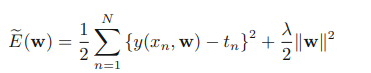

In [162]:
x=df['X_train']
y=df['Y_train']
n=2
A = np.zeros((n+1,n+1))
B= np.zeros((n+1,1))
for i in range(n+1):
    print('row',i)
    for j in range(n+1):
        print('col',j)
        print('element',i+j)
        A[i,j]=sum(x**(i+j))
    print('b element',i)
    B[i]=sum(x**(i)*y)
print(A)
print(B)
c = np.dot(np.linalg.inv(A),B)
c1=np.flip(c)
print(c)
c=c1.ravel()
#List the value of coefficients of estimated regularized least squared polynomial regression models for each case.
print(c)
f = np.poly1d(c)
print(f)

row 0
col 0
element 0
col 1
element 1
col 2
element 2
b element 0
row 1
col 0
element 1
col 1
element 2
col 2
element 3
b element 1
row 2
col 0
element 2
col 1
element 3
col 2
element 4
b element 2
[[20.          9.04298652  5.48310595]
 [ 9.04298652  5.48310595  3.85972426]
 [ 5.48310595  3.85972426  2.91416359]]
[[21.20172461]
 [ 9.58856609]
 [ 5.82402449]]
[[ 1.09584875]
 [-0.20657408]
 [ 0.21024513]]
[ 0.21024513 -0.20657408  1.09584875]
        2
0.2102 x - 0.2066 x + 1.096


In [143]:
Y_check_train=[]
for i in df['X_train']:
    t=0.05094*i**2 + 0.007292*i + 1.057
    Y_check_train.append(t)
    
Y_check_train
Y_check_train=np.array(Y_check_train)

array([1.06709504, 1.09734094, 1.06383793, 1.0613912 , 1.06041027,
       1.07590362, 1.08506314, 1.09617137, 1.10025153, 1.05917542,
       1.0588015 , 1.05884148, 1.06043465, 1.06316576, 1.07571034,
       1.06499581, 1.0863489 , 1.10398829, 1.08534966, 1.06097404])

In [149]:
df2=pd.DataFrame(data=(Y_check_train,Y_train),index=['Y_check_train','Y_train'])


In [172]:
df2=df2.T
df2

,Y_check_train,Y_train
0,1.067095,0.967975
1,1.097341,0.994824
2,1.063838,1.139161
3,1.061391,0.983183
4,1.060410,1.040434
5,1.075904,1.012483
6,1.085063,1.152860
7,1.096171,1.046844
8,1.100252,1.152977
9,1.059175,1.191897


In [174]:
ssr=(df2['Y_check_train'] -df2['Y_train'])**2
ssr

0     0.009825
1     0.010510
2     0.005674
3     0.006117
4     0.000399
5     0.004022
6     0.004596
7     0.002433
8     0.002780
9     0.017615
10    0.000001
11    0.000719
12    0.000028
13    0.008319
14    0.000086
15    0.004657
16    0.005456
17    0.002318
18    0.000658
19    0.000183
dtype: float64

In [176]:
regular =[]
for Lambda in range(1,5):
    regular.append(ssr + ((Lambda/2) * np.sum(c**2)))
    
regular
    

[0     0.653705
 1     0.654390
 2     0.649554
 3     0.649997
 4     0.644279
 5     0.647902
 6     0.648477
 7     0.646313
 8     0.646660
 9     0.661495
 10    0.643881
 11    0.644599
 12    0.643909
 13    0.652199
 14    0.643966
 15    0.648537
 16    0.649336
 17    0.646198
 18    0.644538
 19    0.644063
 dtype: float64,
 0     1.297585
 1     1.298270
 2     1.293434
 3     1.293877
 4     1.288159
 5     1.291782
 6     1.292357
 7     1.290194
 8     1.290540
 9     1.305375
 10    1.287761
 11    1.288479
 12    1.287789
 13    1.296079
 14    1.287846
 15    1.292417
 16    1.293217
 17    1.290078
 18    1.288418
 19    1.287943
 dtype: float64,
 0     1.941465
 1     1.942150
 2     1.937314
 3     1.937757
 4     1.932040
 5     1.935663
 6     1.936237
 7     1.934074
 8     1.934421
 9     1.949255
 10    1.931642
 11    1.932359
 12    1.931669
 13    1.939959
 14    1.931727
 15    1.936297
 16    1.937097
 17    1.933959
 18    1.932298
 19    1.931824
 dtype